In [1]:
import matplotlib.pyplot as plt
import numpy as np

 If you need to make the same plots over and over again with different data sets, or want to easily wrap
 Matplotlib methods, use the recommended signature function below.

In [2]:
def my_plotter(ax, data1, data2, param_dict):
 """
 A helper function to make a graph.
 """
 out = ax.plot(data1, data2, **param_dict)
 return out

 which you would then use twice to populate two subplots:

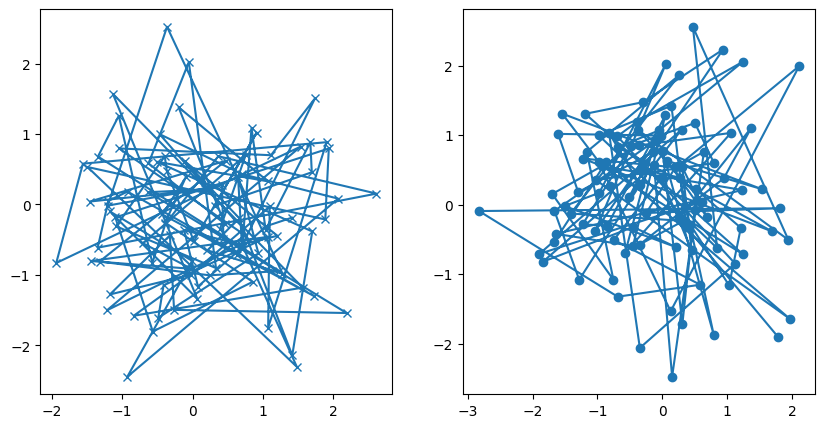

In [16]:
data1, data2, data3, data4 = np.random.randn(4, 100) # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})


**2.5 Styling Artists**

 Mostplotting methods have styling options for the Artists, accessible either when a plotting method is called,
 or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the
 Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

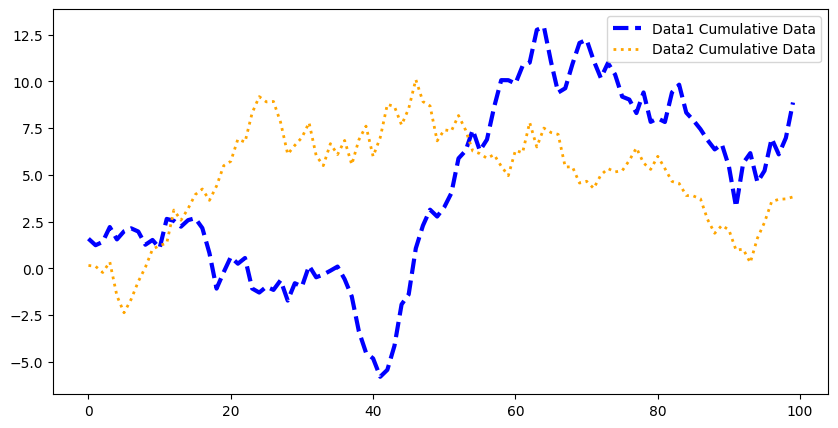

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--', label='Data1 Cumulative Data')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2,  label='Data2 Cumulative Data')
l.set_linestyle(':')
ax.legend()



You're using Matplotlib to plot a cumulative sum of data2 against x, with an orange line of width 2.

l, = ...: The comma is important—it unpacks the single-element tuple returned by plot() into the variable l, which is a Line2D object. This allows you to later modify or reference the line (e.g., change its style or add a legend).


 2.5.1 Colors

 Matplotlib has averyflexiblearrayofcolorsthatareacceptedformostArtists; seeallowablecolordefinitions
 for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the
 markers can be different colors from the interior:

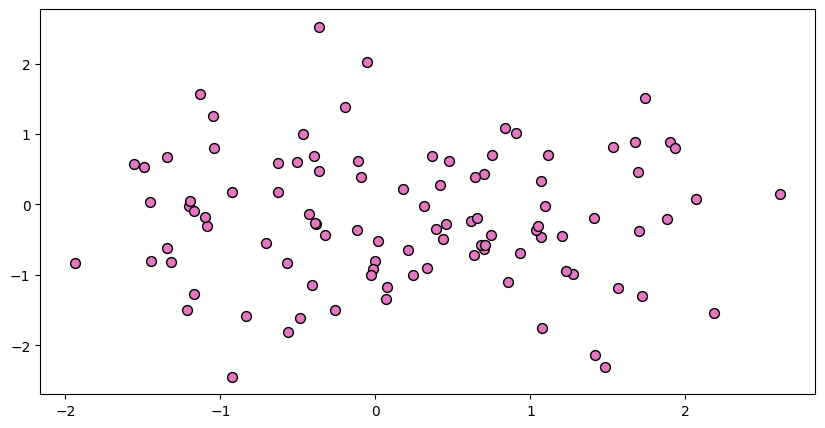

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data1, data2, s=50, facecolor='C6', edgecolor='k')

In [18]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

Base colors

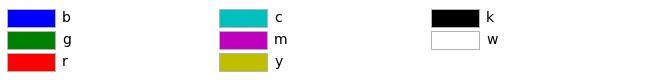

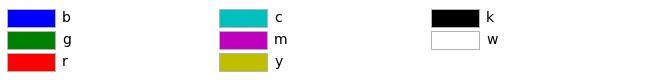

In [19]:
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False)

Tableau Palette (C0=blue, C1=orange)

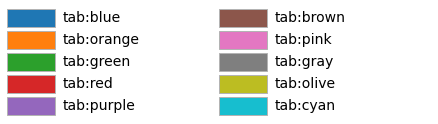

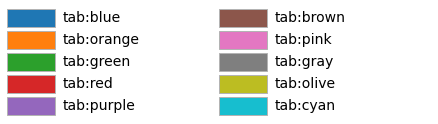

In [20]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

CSS Colors

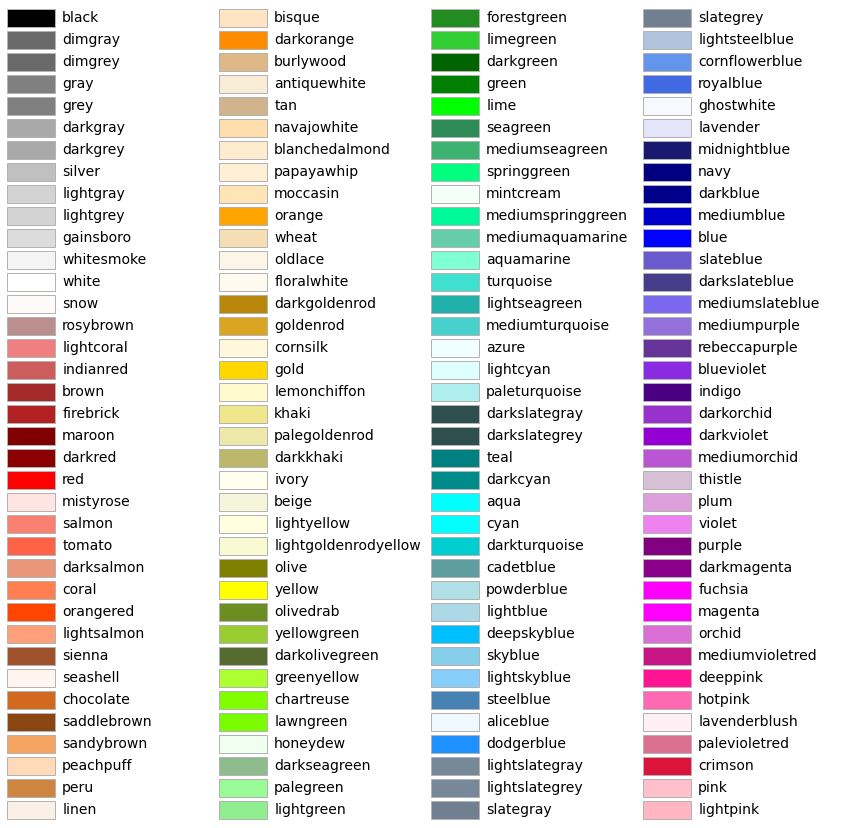

In [24]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

2.5.2 Linewidths, linestyles, and markersizes

 Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked
 lines. Similarly, stroked lines can have a linestyle. See the linestyles example.

 Marker size depends on the method being used. plot specifies markersize in points, and is generally the
 "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the
 visual area of the marker. There is an array of markerstyles available as string codes (see markers), or
 users can define their own MarkerStyle (see Marker reference):

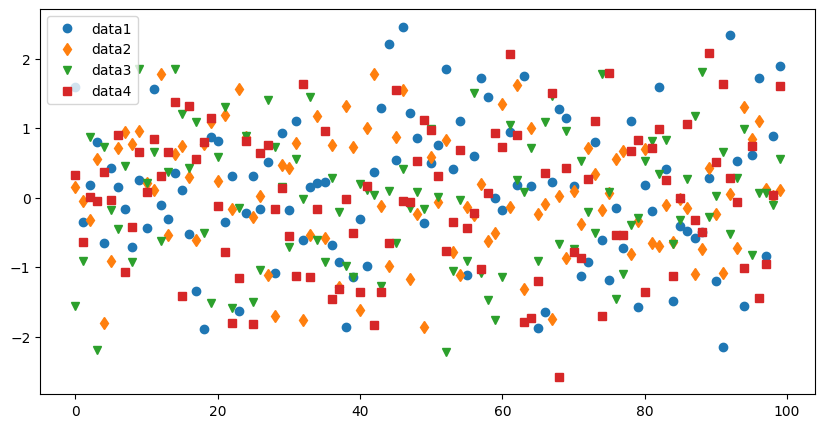

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()
